## Ultimate Challenge Part 3 - Predictive modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

### Loading data

In [2]:
import json
with open('ultimate_data_challenge.json') as datafile:
    data = json.load(datafile)
df = pd.DataFrame(data)

In [3]:
df.tail(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
49990,3.38,5.0,4.7,1.08,Astapor,2014-05-18,iPhone,2014-01-13,33.3,1,True,33.3
49991,1.06,5.0,5.0,1.25,Winterfell,2014-06-29,iPhone,2014-01-08,100.0,0,False,0.0
49992,7.58,5.0,1.0,1.00,King's Landing,2014-01-19,iPhone,2014-01-18,0.0,1,False,0.0
49993,2.53,4.7,4.8,1.11,Astapor,2014-07-01,iPhone,2014-01-03,11.1,3,True,55.6
49994,2.25,4.5,4.6,1.44,Astapor,2014-05-31,iPhone,2014-01-03,37.5,1,False,25.0
49995,5.63,4.2,5.0,1.00,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,False,100.0
49996,0.00,4.0,NaN,1.00,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0
49997,3.86,5.0,5.0,1.00,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,True,100.0
49998,4.58,3.5,3.0,1.00,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0
49999,3.49,5.0,NaN,1.00,Astapor,2014-04-20,Android,2014-01-18,0.0,0,False,0.0


In [4]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Data cleaning

Analysis shows that there are missing values in 'avg_rating_by_driver', 'avg_rating_of_driver' and 'phone' columns. There are only two types of phone, 'iPhone' and 'Android'. We will replace None's using fillforward method.

In [6]:
df['phone'].unique()

array(['iPhone', 'Android', None], dtype=object)

In [7]:
df['phone'].replace('None', np.nan, inplace=True)
df['phone'].fillna(method = 'ffill', inplace = True)

Similar replacement should be done for the 'avg_rating_by_driver' and 'avg_rating_of_driver' columns. However, in this case we replace NaN's with the column averages.

In [8]:
df.avg_rating_by_driver.unique()

array([ 5. ,  4.9,  4. ,  3. ,  4.8,  4.7,  4.5,  4.2,  nan,  4.4,  4.6,
        3.7,  4.3,  3.5,  2. ,  3.8,  2.5,  4.1,  3.9,  1. ,  3.3,  3.4,
        3.6,  3.2,  2.3,  2.8,  1.5,  2.7])

In [9]:
df.avg_rating_of_driver.unique()

array([ 4.7,  5. ,  4.3,  4.6,  4.4,  3.5,  nan,  4.5,  4. ,  3.9,  4.9,
        4.8,  2.5,  3.7,  1. ,  4.1,  4.2,  3. ,  3.8,  2. ,  2.7,  3.3,
        2.8,  3.6,  3.4,  3.2,  2.6,  3.1,  2.9,  1.7,  1.8,  1.5,  2.3,
        1.9,  2.1,  2.4,  1.6,  2.2])

In [10]:
df.avg_rating_by_driver.replace(np.nan, np.mean(df.avg_rating_by_driver), inplace=True)
df.avg_rating_of_driver.replace(np.nan, np.mean(df.avg_rating_of_driver), inplace=True)

#df.avg_rating_of_driver.unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Data preparation

We will convert the columns 'signup_date' and 'last_trip_date' to datetime format, and since all accounts were created in January, create the new columns containing the day and the day of the week of signup. 

In [11]:
df.signup_date = pd.to_datetime(df.signup_date)
df.last_trip_date = pd.to_datetime(df.last_trip_date)

In [12]:
#df.signup_date.dt.month.unique()
df['signup_day'] = df.signup_date.dt.day
df['signup_day_of_week'] = df.signup_date.dt.dayofweek

#df.head()

After that we look at the suspicious data paying attention to the 'avg_dist' and 'trips_in_first_30_days' columns. We sort the columns in descending order and look for the values that stand far apart from all other values. The results below suggest that we should remove three rows.

In [13]:
df.avg_dist.sort_values(ascending = False)[:20]

20701    160.96
534      129.89
1302      79.69
22290     79.34
47595     77.13
36625     73.88
22096     72.20
1493      72.08
19197     71.38
42835     70.48
18824     63.15
8110      62.14
18673     61.45
43587     61.12
799       60.58
38171     58.86
37664     58.86
26716     58.27
35451     57.89
18987     56.53
Name: avg_dist, dtype: float64

In [14]:
df.trips_in_first_30_days.sort_values(ascending = False)[:20]

18514    125
99        73
3030      71
29070     63
48804     58
45489     56
36917     56
29043     55
17942     55
31047     54
33488     54
10863     53
36455     53
40271     51
25520     50
46972     49
17876     49
9061      48
2507      48
21438     47
Name: trips_in_first_30_days, dtype: int64

In [15]:
df.drop([20701, 534, 18514], inplace=True)
df.reset_index(drop = True, inplace = True)

Then, there are 150 rows where the 'avg_dist' (meaning the average distance in miles per trip taken in the first 30 days after signup) column has the value in it equal to 0.0. At the same time, there are as many as 15388 entries that tell us that the number of trips taken during the first 30 days after signup is zero. In our database we have rows containing the 'avg_dist' value equal to zero, and at the same time 'trips_in_first_30_days' value not equal to zero, and vice versa. This calls for questions about the quality of the data.

In [16]:
len(df.avg_dist[df.avg_dist == 0.0])

150

In [17]:
len(df.trips_in_first_30_days[df.trips_in_first_30_days == 0])

15388

Let's remove the entries where 'avg_dist' is zero but 'trips_in_first_30_days' is not zero. We lose 0.2 percent of data, but this may increase the predictive accuracy.

In [18]:
mask1 = ((df.avg_dist == 0.0) & (df.trips_in_first_30_days != 0))
df = df[~mask1]
df.reset_index(drop = True, inplace = True)

In [19]:
len(df.index)

49903

We see that there are just three distinct cities in the column 'city'. We also convert the 'ultimate_black_user' column containing True/False variable to the column with 1.0/0.0 variables. 

In [20]:
df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [21]:
df.ultimate_black_user = df.ultimate_black_user.map({True:1, False:0})

Finally, we create the column with our target variable 'ative_user'. We will consider the user active if the time difference between the day of account creation and the day of the last trip exceeds 150 days (5 months). This is supposed to tell us that a given user is active on his/her 6th month. Such a definition of an active user is very crude but is only possible based on the data we have. The concern regarding the way we define the user being active, comes from the fact that we do not know whether this user was also active on the second, third, fourth and fifth month after signup. Unfortunately, we are building our model based on strongly discontinuous time data. A much better model would require the knowledge of activity during all months preceding the sixth month after signup (number of trips, distance travelled), in which case we could use a much more sensible definition of an active user. For example, a user can't be regarded active if there were no trips at all during 2 or 3 months within a 6-month period, or if the number of trips decreasing monotonically drops below a certain level at some point. 

In [22]:
%%time
def func1(dfr):
    if dfr['last_trip_date'] - dfr['signup_date'] >= timedelta(150):
        return 1.0
    else:
        return 0.0

df['active_user'] = df.apply(func1, axis =1)

Wall time: 32.4 s


There are 12710 active users out of 49903 meaning that we have an imbalanced dataset.

In [23]:
df.active_user[df.active_user == 1.0].value_counts()

1.0    12710
Name: active_user, dtype: int64

For predicitve modelling we will drop from now on the 'signup_date' and 'last_trip_date' columns.

In [24]:
df = df.drop(['signup_date', 'last_trip_date'], axis = 1)

### Exploratory Data Analysis

Let's first look at the distribution of all users over the cities of account creation and answer the question whether the city could be a significant factor in the percentage of active users. We observe an interesting situation in which the city of King's Landing has the highest percentage of active users but the lowest number of people who created an account there.

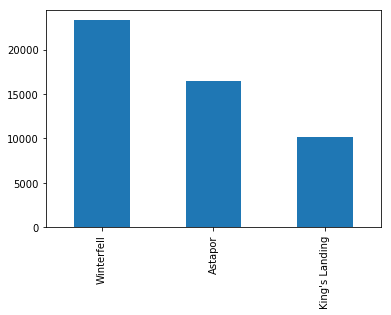

In [25]:
df.city.value_counts().plot(kind="bar")
plt.show()

In [26]:
pd.DataFrame(df.groupby('city')['active_user'].mean())

,active_user
city,
Astapor,0.171079
King's Landing,0.416288
Winterfell,0.243749


We then do a similar investigation regarding the primary device; there are only two types of primary device. We see that the number of customers who use iPhone is more than twice the number of customers who use Android. The proportion of active users among iPhone holders is almost twice that among Android holders.

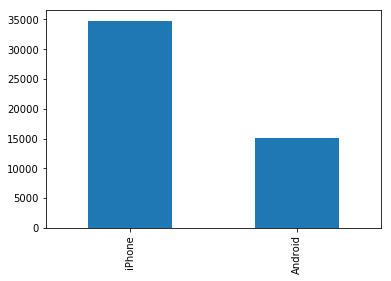

In [27]:
df.phone.value_counts().plot(kind="bar")
plt.show()

In [28]:
pd.DataFrame(df.groupby('phone')['active_user'].mean())

,active_user
phone,
Android,0.135645
iPhone,0.306410


Doing a similar investigation regarding the Ultimate Black factor, we see that the proportion of active users among those who took an Ultimate Black in their first 30 days is notably higher. This is despite the smaller total number of users who actually took it.

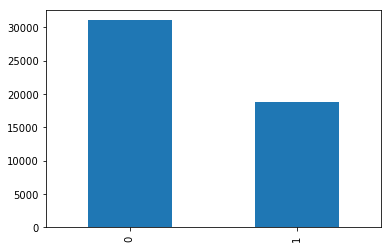

In [29]:
df.ultimate_black_user.value_counts().plot(kind="bar")
plt.show()

In [30]:
pd.DataFrame(df.groupby('ultimate_black_user')['active_user'].mean())

,active_user
ultimate_black_user,
0,0.199478
1,0.345717


We also see that the percentages of active users among those who made a trip during a 30-day period after signup and those who did not make it, are approximately the same. 

In [31]:
df[df.trips_in_first_30_days == 0]['active_user'].mean()

0.22959448921237327

In [32]:
df[df.trips_in_first_30_days != 0]['active_user'].mean()

0.2658843980877879

After that we look at the distribution of active users over signup days and signup days of week. We see that many active users created their accounts on Fridays and Saturdays.

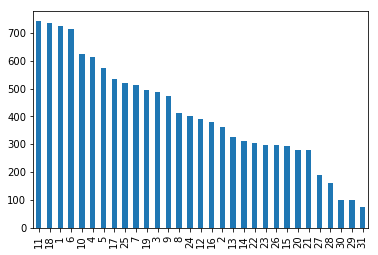

In [33]:
df[df.active_user == 1.0].signup_day.value_counts().plot(kind="bar")
plt.show()

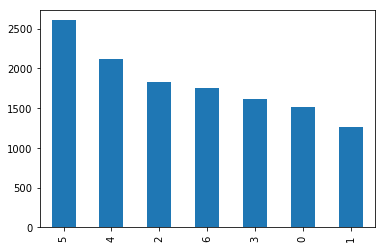

In [34]:
df[df.active_user == 1.0].signup_day_of_week.value_counts().plot(kind="bar")
plt.show()

Finally we examine how the value of 'active_user' column depends on a) the percent of the user’s trips occurring during a weekday ('weekday_pct'), b) the percent of trips taken with surge multiplier > 1 ('surge_pct'), c) the rider’s average rating of their drivers over all of their trips ('avg_rating_of_driver'), d) the rider’s average rating over all of their trips ('avg_rating_by_driver') and e) the average distance in miles per trip ('avg_dist').

a) The histograms below show that active users tend to make their trips during weekdays, and this feature is likely to be important in determining whether the user is active or not.

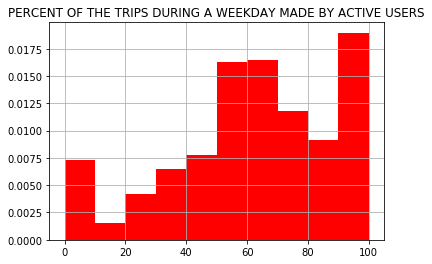

In [35]:
df[df.active_user == 1.0]['weekday_pct'].hist(bins = 10, color ='r', normed = True)
plt.title('PERCENT OF THE TRIPS DURING A WEEKDAY MADE BY ACTIVE USERS')
plt.show()

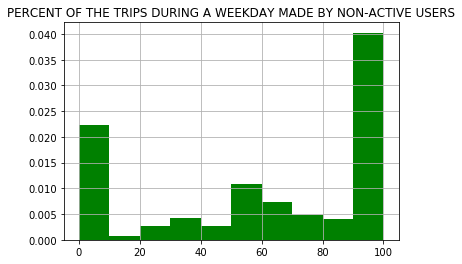

In [36]:
df[df.active_user == 0.0]['weekday_pct'].hist(bins = 10, color ='g', normed = True)
plt.title('PERCENT OF THE TRIPS DURING A WEEKDAY MADE BY NON-ACTIVE USERS')
plt.show()

b) The histograms below show that the distribution of percent of trips taken with surge multiplier > 1 is similar for both active and non-active users, although the mean value is slightly higher for active users.

In [37]:
df[df.active_user == 1.0]['surge_pct'].mean()

9.452769472856165

In [38]:
df[df.active_user == 0.0]['surge_pct'].mean()

8.65801898206639

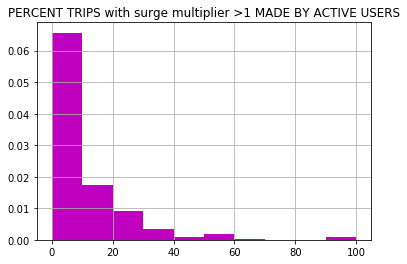

In [39]:
df[df.active_user == 1.0]['surge_pct'].hist(bins = 10, color ='m', normed = True)
plt.title('PERCENT TRIPS with surge multiplier >1 MADE BY ACTIVE USERS')
plt.show()

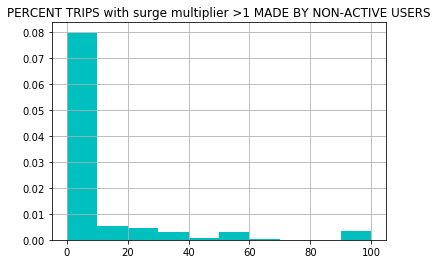

In [40]:
df[df.active_user == 0.0]['surge_pct'].hist(bins = 10, color ='c', normed = True)
plt.title('PERCENT TRIPS with surge multiplier >1 MADE BY NON-ACTIVE USERS')
plt.show()

c) The histograms below shows that the average rating of the drivers over all of the trips made by users does not differ much for active and non-active users.

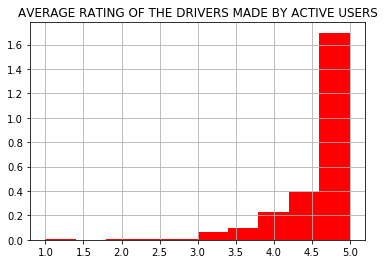

In [41]:
df[df.active_user == 1.0]['avg_rating_of_driver'].hist(bins = 10, color ='r', normed = True)
plt.title('AVERAGE RATING OF THE DRIVERS MADE BY ACTIVE USERS')
plt.show()

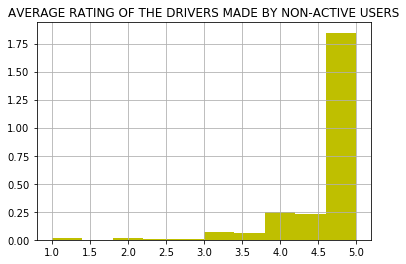

In [42]:
df[df.active_user == 0.0]['avg_rating_of_driver'].hist(bins = 10, color ='y', normed = True)
plt.title('AVERAGE RATING OF THE DRIVERS MADE BY NON-ACTIVE USERS')
plt.show()

d) The histograms below shows that the rider's average rating are very similar for both active and non-active users, but the mean value is a bit higher for non-active users.

In [43]:
df[df.active_user == 1.0]['avg_rating_by_driver'].mean()

4.761781378608685

In [44]:
df[df.active_user == 0.0]['avg_rating_by_driver'].mean()

4.785015737291158

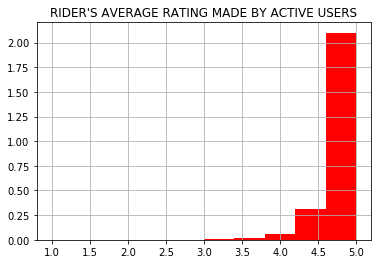

In [45]:
df[df.active_user == 1.0]['avg_rating_by_driver'].hist(bins = 10, color ='r', normed = True)
plt.title('RIDER\'S AVERAGE RATING MADE BY ACTIVE USERS')
plt.show()

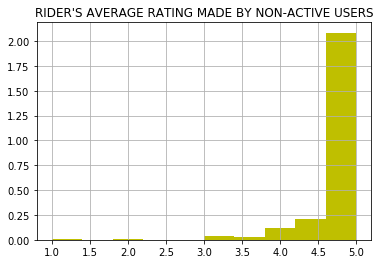

In [46]:
df[df.active_user == 0.0]['avg_rating_by_driver'].hist(bins = 10, color ='y', normed = True)
plt.title('RIDER\'S AVERAGE RATING MADE BY NON-ACTIVE USERS')
plt.show()

e) The scatter plot below shows that the average distance distribution for active users is narrower and shifted towards smaller distances compared to non-active users. It is very possible that active users often take business trips that are relatively short and follow the same routes.   

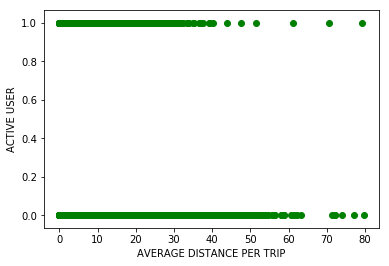

In [47]:
plt.scatter(x = df['avg_dist'], y = df['active_user'], 
            marker = 'o', c = 'g')
plt.xlabel('AVERAGE DISTANCE PER TRIP')
plt.ylabel('ACTIVE USER')
plt.show()

### Predictive modelling

We now do the predictive modelling to determine the factors that predict which users are active. We have a binary classification problem for the imbalanced dataset. We first use pd.get_dummies to encode the 'city' and 'phone' variables. This will leave us with 16 columns.

In [48]:
df = pd.get_dummies(df, columns= ['city', 'phone'])

len(df.columns)
#df.head(10)

16

In [49]:
# create predictor and target variables

X = df.drop('active_user',axis =1).values
#X.info()

y = df['active_user'].values

# create the list containing the relevant columns
column_names = df.drop('active_user',axis =1).columns.values

We will use first the Logistics Regression from the family of linear methods. The hyperparameters are determined using 5-fold cross-validation, and 70/30 percent of the dataset are used for training/test. 

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [51]:
%%time

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight = 'balanced')
X =  StandardScaler().fit_transform(X)
parameters = {"C": [0.001, 0.01, 0.1, 1.], "penalty": ['l1', 'l2']}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, 
                                                    stratify = y)

cv_logreg = GridSearchCV(logreg, param_grid = parameters, cv = 5, scoring = 'roc_auc')
cv_logreg.fit(X_train, y_train)

y_pred_logreg = cv_logreg.predict(X_test)

print('The value of C is:',cv_logreg.best_params_)

logreg_training_score = cv_logreg.score(X_train, y_train)
logreg_test_score = cv_logreg.score(X_test, y_test)
logreg_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
logreg_classification_report = classification_report(y_test, y_pred_logreg)

print('Training score:', logreg_training_score)
print('Test score:', logreg_test_score)

print(logreg_confusion_matrix)
print(logreg_classification_report)

The value of C is: {'C': 0.1, 'penalty': 'l1'}
Training score: 0.777119829807
Test score: 0.777242710819
[[7790 3368]
 [1125 2688]]
             precision    recall  f1-score   support

        0.0       0.87      0.70      0.78     11158
        1.0       0.44      0.70      0.54      3813

avg / total       0.76      0.70      0.72     14971

Wall time: 34.1 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:438: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


We then examine the relative importance of weights in the Logistic Regression method.

In [52]:
# examining the coefficients

logreg_coeff = LogisticRegression(class_weight = 'balanced', 
                                  penalty = cv_logreg.best_params_['penalty'], 
                                  C = cv_logreg.best_params_['C']).fit(X_train, y_train).coef_

df_logit_coeff = pd.DataFrame(column_names, columns = ['COLUMN_NAME'])
df_logit_coeff['LOGREG_COEFF'] = np.transpose(np.abs(logreg_coeff))
df_logit_coeff.sort_values(by ='LOGREG_COEFF', ascending = False, inplace =True)

df_logit_coeff

,COLUMN_NAME,LOGREG_COEFF
8,signup_day,0.627305
5,trips_in_first_30_days,0.465234
14,phone_iPhone,0.392090
11,city_King's Landing,0.383487
6,ultimate_black_user,0.346194
0,avg_dist,0.257589
10,city_Astapor,0.202343
13,phone_Android,0.068609
4,surge_pct,0.065294
1,avg_rating_by_driver,0.058881


We see that the accuracy of Logistic Regression method seems to be not very high. Let's try the Random Forest Classifier from the family of ensemble methods. The hyperparameters are determined using 5-fold cross-validation, and 70/30 percent of the dataset are used for training/test. After that we provide the table with feature importance.

In [53]:
%%time

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight = 'balanced')


forest_params = {'min_samples_split': [2, 4, 8], 
               'min_samples_leaf': [1, 2, 4]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, 
                                                    stratify = y)

cv_rfc = GridSearchCV(rfc, forest_params, cv=5, scoring = 'roc_auc')
cv_rfc.fit(X_train, y_train)

y_pred_rfc = cv_rfc.predict(X_test)

print('The values of best parameters:',cv_rfc.best_params_)


rfc_training_score = cv_rfc.score(X_train, y_train)
rfc_test_score = cv_rfc.score(X_test, y_test)
rfc_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
rfc_classification_report = classification_report(y_test, y_pred_rfc)

print('Training score:', rfc_training_score)
print('Test score:', rfc_test_score)

print(rfc_confusion_matrix)
print(rfc_classification_report)

The values of best parameters: {'min_samples_leaf': 4, 'min_samples_split': 8}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:438: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


Training score: 0.954966528035
Test score: 0.836958103679
[[9247 1911]
 [1295 2518]]
             precision    recall  f1-score   support

        0.0       0.88      0.83      0.85     11158
        1.0       0.57      0.66      0.61      3813

avg / total       0.80      0.79      0.79     14971

Wall time: 43.3 s


In [54]:
# examining the feature importances

rfc_coeff = RandomForestClassifier(class_weight = 'balanced', 
                                   min_samples_leaf = cv_rfc.best_params_['min_samples_leaf'],
                                  min_samples_split = cv_rfc.best_params_['min_samples_split'])\
                                  .fit(X_train, y_train).feature_importances_

df_rfc_coeff = pd.DataFrame(column_names, columns = ['COLUMN_NAME'])
df_rfc_coeff['RFC_COEFF'] = np.transpose(rfc_coeff)

df_rfc_coeff.sort_values(by ='RFC_COEFF', ascending = False, inplace =True)

df_rfc_coeff

,COLUMN_NAME,RFC_COEFF
8,signup_day,0.151421
1,avg_rating_by_driver,0.135730
7,weekday_pct,0.119541
0,avg_dist,0.116133
4,surge_pct,0.083979
3,avg_surge,0.079531
5,trips_in_first_30_days,0.058069
2,avg_rating_of_driver,0.050446
11,city_King's Landing,0.047095
9,signup_day_of_week,0.044675


We then use the Gradient Boosting Classifier hoping to increase the accuracy a bit more.

In [55]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(loss = 'deviance')
X =  StandardScaler().fit_transform(X)
boost_params = {'subsample': [.1, .2, .4, .6, .8, 1.]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, 
                                                    stratify = y)

cv_gbc = GridSearchCV(gbc, boost_params, cv=5, scoring = 'roc_auc')

cv_gbc.fit(X_train, y_train)

y_pred_gbc = cv_gbc.predict(X_test)

print('The values of best parameters:',cv_gbc.best_params_)


gbc_training_score = cv_gbc.score(X_train, y_train)
gbc_test_score = cv_gbc.score(X_test, y_test)
gbc_confusion_matrix = confusion_matrix(y_test, y_pred_gbc)
gbc_classification_report = classification_report(y_test, y_pred_gbc)

print('Training score:', gbc_training_score)
print('Test score:', gbc_test_score)

print(gbc_confusion_matrix)
print(gbc_classification_report)

The values of best parameters: {'subsample': 0.8}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:438: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


Training score: 0.861775343318
Test score: 0.856586934059
[[10300   858]
 [ 1825  1988]]
             precision    recall  f1-score   support

        0.0       0.85      0.92      0.88     11158
        1.0       0.70      0.52      0.60      3813

avg / total       0.81      0.82      0.81     14971

Wall time: 6min 7s


In [56]:
# examining the feature importances

gbc_coeff = GradientBoostingClassifier(loss = 'deviance',
                                      subsample = cv_gbc.best_params_['subsample'])\
                                  .fit(X_train, y_train).feature_importances_

    
df_gbc_coeff = pd.DataFrame(column_names, columns = ['COLUMN_NAME'])
df_gbc_coeff['GBC_COEFF'] = np.transpose(gbc_coeff)

df_gbc_coeff.sort_values(by ='GBC_COEFF', ascending = False, inplace =True)

#writer1 = pd.ExcelWriter('gbc_table.xlsx')
#df_gbc_coeff.to_excel(writer1)
#writer1.save()

df_gbc_coeff

,COLUMN_NAME,GBC_COEFF
8,signup_day,0.158441
7,weekday_pct,0.155517
0,avg_dist,0.095372
4,surge_pct,0.094742
1,avg_rating_by_driver,0.084815
5,trips_in_first_30_days,0.084139
2,avg_rating_of_driver,0.061263
3,avg_surge,0.053769
11,city_King's Landing,0.053432
6,ultimate_black_user,0.048930


We see that the Random Forest and Gradient Boosting Classifiers lead to higher overall accuracy. We also see that the first 6 most important features are the same in both ensemble methods. It is interesting that 'signup_day' seems to be the most important feature not only in both ensemble methods but also in the method of Logistic Regression.  

Despite not very high accuracy and crudeness of our model, one can make a few recommendations for Ultimate.

1) Percentage of trips made during weekdays is an important feature, and we saw that the overwhelming majority of active users made their trips during weekdays. Based on different data, it could be interesting to investigate the purposes of the trips made by active and non-active users during weekdays and think of the ways to encourage non-active users to use trips more often if purposes of their trips are similar to those of active users. 

2) We saw that a very high percentage of those who created their accounts in the city of King's Landing are active users. It is important to understand why the percentage of active users in two other cities is considerably smaller. One can try to answer the question of what measures should be taken and possibly other services offered in order to increase the numbers of active users in them. 

3) Then, it is worth understanding why the percentage of active users who took an Ultimate Black in their first 30 days is higher. 

4) Finally, one could look at the issue of what could be offered to Android phone users in order to increase their activity, and what is special about iPhone users when they use their accounts. 